<a href="https://colab.research.google.com/github/Raajarapu/SAP_COLLEGE_EDUNET_FOUDATION/blob/main/Model3SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, auc

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('gas_supply_synthetic.csv')

In [ ]:
df

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
0,1,2023-04-13,East,CityH,S1124,11.45,43.70,168.66,11.91,1500,4,3,0,69.00,1,0,706,5487,4.00,0
1,2,2023-12-15,East,CityI,S1256,25.75,44.28,352.74,195.68,1500,2,4,0,65.82,0,0,893,2447,10.12,0
2,3,2023-09-28,West,CityK,S1091,20.06,41.38,256.57,142.20,1500,3,3,0,62.42,0,0,957,3632,7.37,0
3,4,2023-04-17,East,CityI,S1224,23.97,42.08,674.56,128.91,2000,8,0,1,53.15,0,0,1224,13953,6.71,1
4,5,2023-03-13,North,CityA,S1194,17.03,53.11,117.94,93.00,1000,6,0,0,56.36,0,0,622,4877,5.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,2023-10-23,South,CityD,S1090,15.17,45.39,260.91,152.42,2000,5,0,0,46.44,0,0,886,9871,7.53,0
14996,14997,2023-05-14,Central,CityM,S1035,22.89,75.75,69.37,152.10,1500,8,6,0,65.07,0,0,657,10889,6.96,0
14997,14998,2023-01-27,East,CityI,S1006,25.43,68.46,117.71,81.86,1500,9,4,0,61.52,0,0,823,13279,9.41,0
14998,14999,2023-02-07,South,CityE,S1320,20.48,88.34,318.11,29.14,1500,13,1,0,71.71,0,0,859,15802,4.69,1


In [ ]:
df.head()

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
0,1,2023-04-13,East,CityH,S1124,11.45,43.70,168.66,11.91,1500,4,3,0,69.00,1,0,706,5487,4.00,0
1,2,2023-12-15,East,CityI,S1256,25.75,44.28,352.74,195.68,1500,2,4,0,65.82,0,0,893,2447,10.12,0
2,3,2023-09-28,West,CityK,S1091,20.06,41.38,256.57,142.20,1500,3,3,0,62.42,0,0,957,3632,7.37,0
3,4,2023-04-17,East,CityI,S1224,23.97,42.08,674.56,128.91,2000,8,0,1,53.15,0,0,1224,13953,6.71,1
4,5,2023-03-13,North,CityA,S1194,17.03,53.11,117.94,93.00,1000,6,0,0,56.36,0,0,622,4877,5.59,0


In [ ]:
df.head(5000)

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
0,1,2023-04-13,East,CityH,S1124,11.45,43.70,168.66,11.91,1500,4,3,0,69.00,1,0,706,5487,4.00,0
1,2,2023-12-15,East,CityI,S1256,25.75,44.28,352.74,195.68,1500,2,4,0,65.82,0,0,893,2447,10.12,0
2,3,2023-09-28,West,CityK,S1091,20.06,41.38,256.57,142.20,1500,3,3,0,62.42,0,0,957,3632,7.37,0
3,4,2023-04-17,East,CityI,S1224,23.97,42.08,674.56,128.91,2000,8,0,1,53.15,0,0,1224,13953,6.71,1
4,5,2023-03-13,North,CityA,S1194,17.03,53.11,117.94,93.00,1000,6,0,0,56.36,0,0,622,4877,5.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-02-25,East,CityI,S1295,24.10,82.14,474.07,115.02,1000,2,5,0,48.65,0,0,973,1775,7.17,0
4996,4997,2023-12-26,West,CityJ,S1405,24.37,52.99,126.58,8.13,1500,2,1,0,59.17,0,0,682,2818,5.97,0
4997,4998,2023-04-20,North,CityC,S1202,36.14,42.95,192.38,192.19,1000,7,3,0,65.83,0,0,808,5144,7.70,1
4998,4999,2023-07-11,Central,CityO,S1446,22.12,21.67,6.00,155.81,1500,4,1,0,57.10,0,0,626,4987,8.86,0


In [ ]:
df.isnull().sum()

record_id                     0
date                          0
region                        0
city                          0
station_id                    0
temp_c                        0
humidity_pct                  0
population_density_per_km2    0
distance_to_refinery_km       0
truck_capacity_m3             0
num_trucks                    0
day_of_week                   0
holiday_flag                  0
gas_price_per_unit            0
maintenance_flag              0
pipeline_disruption_flag      0
demand_volume_m3              0
supply_capacity_m3            0
delivery_time_hrs             0
stockout                      0
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [ ]:
df.sample(1000)

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
13789,13790,2023-03-12,East,CityG,S1003,35.80,64.29,518.91,35.54,1500,5,6,0,57.28,0,0,1086,7083,6.96,0
6601,6602,2023-08-10,East,CityG,S1241,13.43,81.53,38.34,116.16,2000,7,3,0,49.34,0,0,698,12766,6.48,0
10450,10451,2023-03-21,Central,CityM,S1162,25.04,82.92,224.77,66.19,2500,9,1,0,58.98,0,0,937,18522,7.82,1
5254,5255,2023-03-24,West,CityJ,S1033,21.46,61.42,140.42,109.36,1000,8,4,0,64.26,0,0,622,7457,4.08,0
419,420,2023-12-31,South,CityE,S1306,22.67,35.24,717.19,141.43,2500,5,6,0,67.18,0,0,1457,9193,6.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8677,8678,2023-04-24,North,CityC,S1213,22.40,64.60,57.75,163.28,1500,7,0,0,63.35,0,0,622,10463,7.06,0
11214,11215,2023-06-15,West,CityJ,S1063,30.02,14.82,17.26,136.19,1000,7,3,0,59.61,0,0,611,5101,8.40,0
12848,12849,2023-07-06,Central,CityO,S1103,24.28,73.59,542.82,86.67,2000,5,3,0,56.88,0,0,1077,9629,4.92,1
11759,11760,2023-08-21,Central,CityM,S1471,24.14,27.06,66.60,140.11,1500,5,0,0,62.88,0,0,766,5900,7.00,0


In [ ]:
y = df['stockout']
X = df[[
    'temp_c','humidity_pct','population_density_per_km2','distance_to_refinery_km',
    'truck_capacity_m3','num_trucks','day_of_week','holiday_flag','gas_price_per_unit',
    'maintenance_flag','pipeline_disruption_flag','demand_volume_m3','supply_capacity_m3','delivery_time_hrs'
]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.696


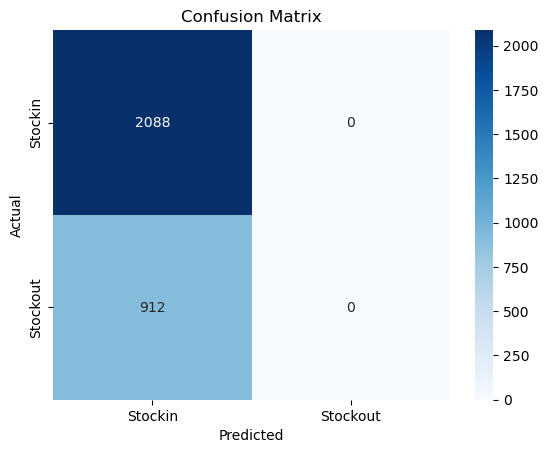

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stockin', 'Stockout'], yticklabels=['Stockin', 'Stockout'] )

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))



Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      2088
           1       1.00      0.00      0.00       912

    accuracy                           0.70      3000
   macro avg       0.85      0.50      0.41      3000
weighted avg       0.79      0.70      0.57      3000



In [ ]:
coefficients = svm_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

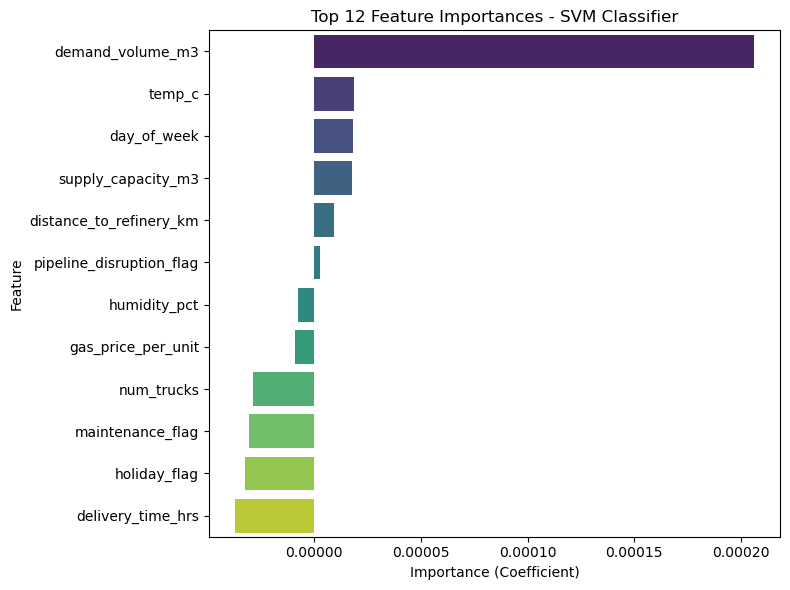

In [ ]:
# GRAPH 1: Top 12 Feature Importances
plt.figure(figsize=(8,6))
sns.barplot(
    data=feature_importance.head(12),
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title("Top 12 Feature Importances - SVM Classifier")
plt.xlabel("Importance (Coefficient)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

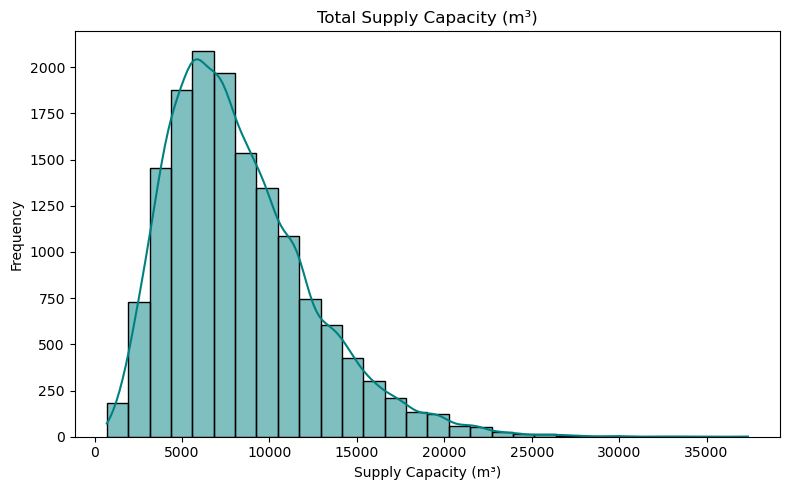

In [ ]:
#GRAPH 2: Total Supply Capacity (m³)
if 'supply_capacity_m3' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['supply_capacity_m3'], bins=30, kde=True, color='teal')
    plt.title("Total Supply Capacity (m³)")
    plt.xlabel("Supply Capacity (m³)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

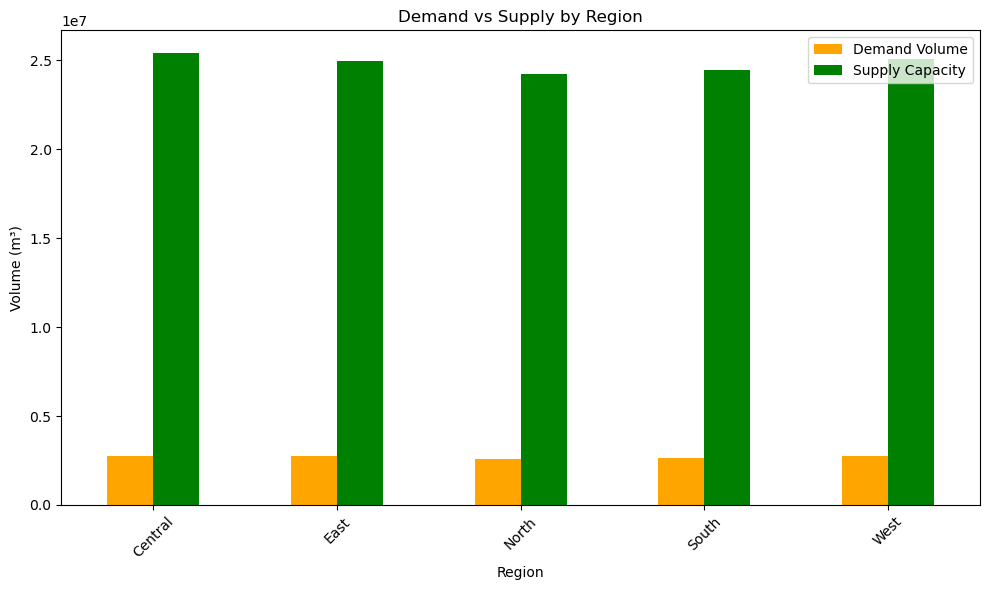

In [ ]:
# GRAPH 3: Demand vs Supply by Region
if {'region', 'demand_volume_m3', 'supply_capacity_m3'}.issubset(df.columns):
    region_stats = df.groupby('region')[['demand_volume_m3', 'supply_capacity_m3']].sum().reset_index()

    region_stats.plot(
        x='region',
        kind='bar',
        figsize=(10,6),
        stacked=False,
        color=['orange', 'green']
    )
    plt.title("Demand vs Supply by Region")
    plt.xlabel("Region")
    plt.ylabel("Volume (m³)")
    plt.xticks(rotation=45)
    plt.legend(["Demand Volume", "Supply Capacity"])
    plt.tight_layout()
    plt.show()

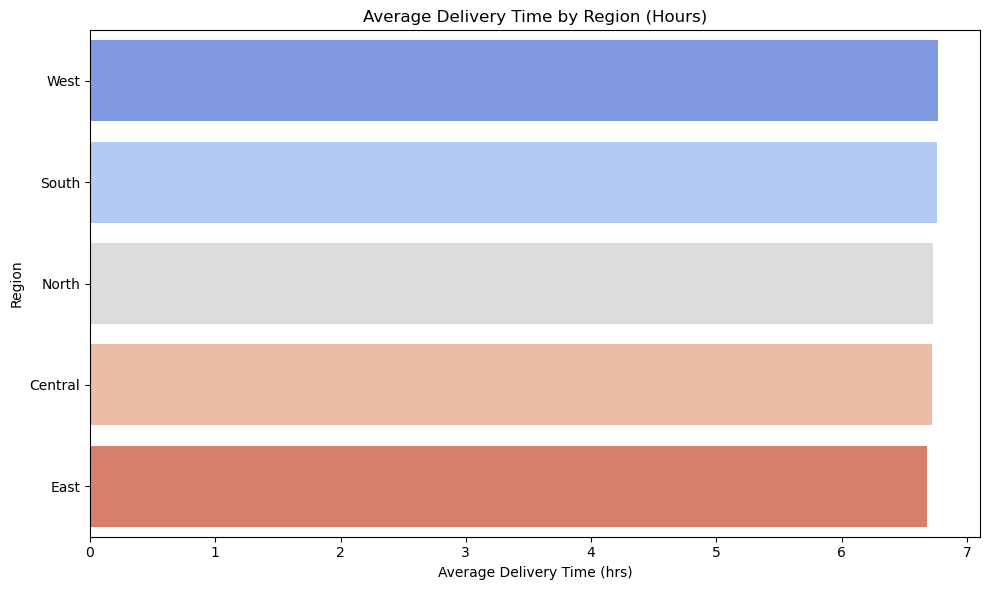

In [ ]:
#GRAPH 4: Average Delivery Time by Region
if {'region', 'delivery_time_hrs'}.issubset(df.columns):
    avg_delivery = df.groupby('region')['delivery_time_hrs'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(
    x=avg_delivery.values,
    y=avg_delivery.index,
    hue=avg_delivery.index,   # add hue to comply with new API
    palette='coolwarm',
    legend=False
)

    plt.title("Average Delivery Time by Region (Hours)")
    plt.xlabel("Average Delivery Time (hrs)")
    plt.ylabel("Region")
    plt.tight_layout()
    plt.show()

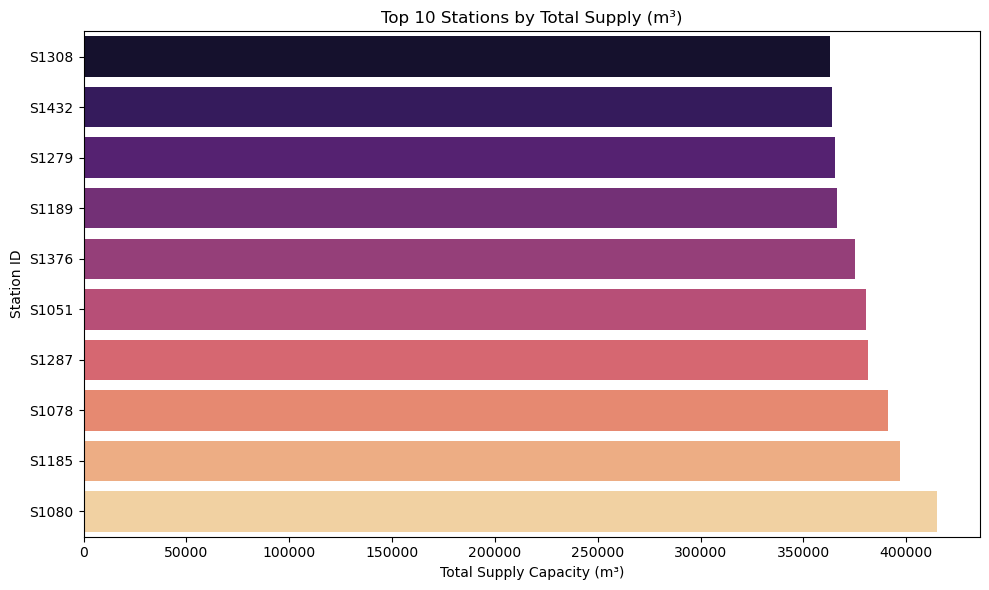

In [ ]:
#GRAPH 5: Top 10 Stations by Total Supply
if {'station_id', 'supply_capacity_m3'}.issubset(df.columns):
    top_stations = df.groupby('station_id')['supply_capacity_m3'].sum().nlargest(10).sort_values()
    plt.figure(figsize=(10,6))
    sns.barplot(
    x=top_stations.values,
    y=top_stations.index,
    hue=top_stations.index,
    palette='magma',
    legend=False
)

    plt.title("Top 10 Stations by Total Supply (m³)")
    plt.xlabel("Total Supply Capacity (m³)")
    plt.ylabel("Station ID")
    plt.tight_layout()
    plt.show()